## Working with notebooks

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Example of Potential Energy Function and corresponding Boltzmann Distribution

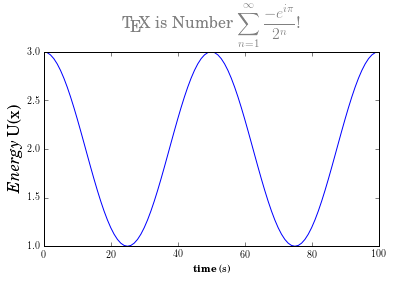

In [47]:
# Example data
t = np.arange(0.0, 100.0 + 0.01, 1.00)
s = np.cos(4/100 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{Energy} U(x)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.savefig('tex_demo')

plt.show()

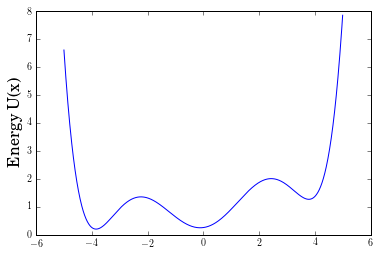

In [48]:
x = np.arange(-5.0, 5.0, 0.01)
y = 0.0025*(np.power(x,6.0)-30.0*np.power(x,4.0)+238.0*np.power(x,2.0)+56.0*x+100.0)
plt.plot(x,y)
plt.ylabel(r'Energy U(x)',fontsize=16)
plt.savefig('potential')
plt.show()

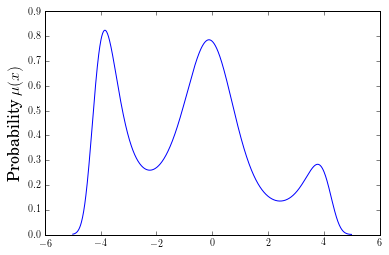

In [49]:
x = np.arange(-5.0, 5.0, 0.01)
y = np.exp(-0.0025*(np.power(x,6.0)-30.0*np.power(x,4.0)+238.0*np.power(x,2.0)+56.0*x+100.0))
plt.plot(x,y)
plt.ylabel(r'Probability \mu(x)',fontsize=16)
plt.savefig('probability')
plt.show()
# normieren!

### Boltzmann Distribution of a Given Potential Energy Function

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import msmtools.generation as msmgen
import pyemma.msm as msm

C:\Users\suso\Anaconda3\lib\site-packages\pyemma\__init__.py:108: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.3.2, you have 2.3.1.
  .format(latest=latest, current=current), category=UserWarning)


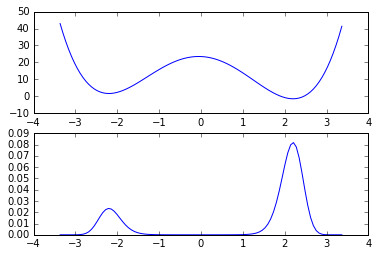

In [4]:
def V(x, s, d):
    return (x**2-s**2)**2 + s*d*(1.0/3*x**3 - s**2*x)
# Potential parameters
s = 2.2
d = 0.1
# Discretisation
L = 3.4
nx = 100
xedges = np.linspace(-L, L, nx+1)
dx = xedges[1]-xedges[0]
xcenters = xedges[0:-1]+0.5*dx
# Stationary vector
kB=8.314472471220217*1e-3 # kJ/(K*mol)
T=300.0 # K
beta=1.0/(kB*T) # mol/kJ
nu_ref = np.exp(-beta*V(xcenters, s, d))
pi_ref = nu_ref/nu_ref.sum()
# Metropolis-Rosenbluth transition matrix
P_ref = msmgen.transition_matrix_metropolis_1d(beta*V(xcenters, s, d))
msm_ref = msm.markov_model(P_ref)
# Plot potential and stationary vector values at centers
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(xcenters, V(xcenters, s, d))
ax2 = fig.add_subplot(212)
ax2.plot(xcenters, pi_ref)
# Compute reference relaxation time scales
#print "The largest relaxation timescale for the process is %.3e steps" %msm_ref.timescales(1)
plt.show()

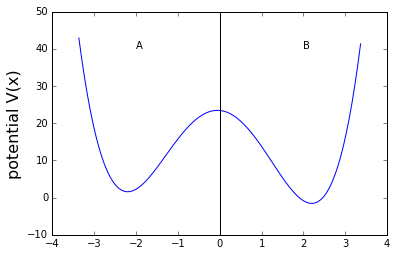

In [29]:
def V(x, s, d):
    return (x**2-s**2)**2 + s*d*(1.0/3*x**3 - s**2*x)
# Potential parameters
s = 2.2
d = 0.1
# Discretisation
L = 3.4
nx = 100
xedges = np.linspace(-L, L, nx+1)
dx = xedges[1]-xedges[0]
xcenters = xedges[0:-1]+0.5*dx
# Stationary vector
kB=8.314472471220217*1e-3 # kJ/(K*mol)
T=300.0 # K
beta=1.0/(kB*T) # mol/kJ
nu_ref = np.exp(-beta*V(xcenters, s, d))
pi_ref = nu_ref/nu_ref.sum()
# Metropolis-Rosenbluth transition matrix
P_ref = msmgen.transition_matrix_metropolis_1d(beta*V(xcenters, s, d))
msm_ref = msm.markov_model(P_ref)
# Plot potential and stationary vector values at centers
fig = plt.figure()
#ax1 = fig.add_subplot(211)
plt.plot(xcenters, V(xcenters, s, d))
plt.axvline(x=0.0, ymin=-10.0, ymax = 50.0, linewidth=1, color='k')
plt.text(-2.0, 40.0, 'A')
plt.text(2.0, 40.0, 'B')
# Compute reference relaxation time scales
#print "The largest relaxation timescale for the process is %.3e steps" %msm_ref.timescales(1)
plt.ylabel(r'potential V(x)',fontsize=16)
#plt.savefig('doublewell')
plt.show()

In [6]:
import pyemma

In [7]:
from numpy import *

In [11]:
M = array([[0.9,0.1],[0.1,0.9]])
M

array([[ 0.9,  0.1],
       [ 0.1,  0.9]])

In [16]:
pyemma.msm.PCCA(M, 2).coarse_grained_stationary_probability

array([ 0.5,  0.5])

In [17]:
pyemma.msm.PCCA(M, 2).coarse_grained_transition_matrix

array([[ 0.9,  0.1],
       [ 0.1,  0.9]])

In [18]:
pyemma.msm.PCCA(M, 2).memberships

array([[ 1.,  0.],
       [ 0.,  1.]])

In [20]:
pyemma.msm.PCCA(M, 2).metastable_assignment

[array([0], dtype=int64), array([1], dtype=int64)]

In [21]:
pyemma.msm.PCCA(M, 2).metastable_sets

[array([0], dtype=int64), array([1], dtype=int64)]

In [22]:
pyemma.msm.PCCA(M, 2).n_metastable

2

In [23]:
pyemma.msm.PCCA(M, 2).output_probabilities

array([[ 1.,  0.],
       [ 0.,  1.]])

In [24]:
pyemma.msm.PCCA(M, 2).stationary_probability

array([ 0.5,  0.5])

In [25]:
pyemma.msm.PCCA(M, 2).transition_matrix

array([[ 0.9,  0.1],
       [ 0.1,  0.9]])

### The basics

We have not worked with code cells yet. Let's try. Type a simple python code line and press `Shift-Enter`

In [9]:
13 + 24

37

The return value of the last line in the code is shown as output. You can suppress this by adding a `;` to the end of the line

In [11]:
3 + 9;

Understand that you can execute the cells in any order. This is good and bad. 

Good because you can just edit a cell and rerun it in any order and 
bad because you can just edit a cell and rerun it in any order. It provides lots of convenience but the also the danger of loosing track of what happened.

In [15]:
x = 3

In [16]:
x *= 3
x

9

Everytime you rerun the above cell the output changesso sometimes you need to reexecute other cells, too. And in the worst case in a very specific order. Try to keep your notebooks as linear as possible from top to bottom. This way you can just kill the kernel and restart. There is actually a command to run all cells from the top to the current cell. This might save lots of time.

Before you start with some exercises, there are some things that also help you writing code here, similar to pycharm. Try this now: Execute the code cell below

In [17]:
s = 'This is a useless string unless we do something with it.'
s

'This is a useless string unless we do something with it.'

Say, we wanted to run a method that can be run for string objects like `s`. The object is already in memory so we could ask the kernel what methods are available. There is a function to get all that information `dir()`. Let's try it.

In [18]:
dir(s)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

That is nice to have, so all these methods and attributes can be used with our object `s`. 

In [19]:
s.upper()

'THIS IS A USELESS STRING UNLESS WE DO SOMETHING WITH IT.'

In [27]:
s.partition()

TypeError: partition() takes exactly one argument (0 given)

There is our first error. It means that we ran the method `.partition()` but it requires one argument and we called it without any. Time to look up the function `partition` in the online documentation. Try google `python string partition` and you should find something that explains what is missing. Most functions in python have a documentation attached. Actually python has a build-in mechanism that will attach documentation to a function if you want to. 

In this notebooks you can check the docs using a question mark `?` and the beginning or end

In [25]:
s.partition?

An extra tab on the bottom will appear with the documentation (if available). Apparently we need a separator. Let's try that.

In [30]:
parts = s.partition('unless')
parts

('This is a useless string ', 'unless', ' we do something with it.')

This worked. Now we have an object `parts` which is a tuple of three strings.

Although the `dir()` command is very powerful this is unneceearily complicated. The same can be done using the `Tab` key. Let's try. type `s.` and press `Tab` and pick whatever function you want. 

In [35]:
s.count('e')

5

Similar for the `?` just press `Shift-Tab`. Try writing `s` and then `Shift-Tab`. Continue typing `.` press `Tab` select `count` press `Enter` press `Shift-Tab` and see the docs of the count function.

In [38]:
s.count

'This is a useless string unless we do something with it.'

Time to actually write some code

### Exercises

#### Exercise 1

Write code that will scan a file and computes the fraction of spaces in the file. Generate a simple test file with some trick. Run the code cell below

In [39]:
%%file input1.txt
Lorem ipsum dolor sit amet, consectetur adipisici elit, 
sed eiusmod tempor incidunt ut labore et dolore magna aliqua. 
Ut enim ad minim veniam, quis nostrud exercitation ullamco 
laboris nisi ut aliquid ex ea commodi consequat. Quis aute iure 
reprehenderit in voluptate velit esse cillum dolore eu fugiat 
nulla pariatur. Excepteur sint obcaecat cupiditat non proident, 
sunt in culpa qui officia deserunt mollit anim id est laborum.

Writing input1.txt


Code cells starting with one or two `%` are referred to with cell-magic. A single `%` will act on a specific line, while two `%%` will act on the rest of the whole cell. Effectively you call a _magic_ function with the rest of the cell as input. Optional arguments must be in the first line. In our case a file writing function is called with filename `input1.txt` and content `Lorem ipsum...`. This can convenient. We will later see more cell-magic.

Let's see, if we have new file and list the files in the current directory. You can run terminal commands by starting a line with an exclamation mark `!`. Beware that you can delete files this way. Even your own notebook.

Try `!dir` on windows or `!ls` on Unix systems.

In [40]:
!ls

Python Example.ipynb                   Untitled1.ipynb                        input1.txt                             use notebooks.ipynb
Untitled.ipynb                         exercises                              introdution to ipython notebooks.ipynb


There should be a file `input1.txt` now.

Now go ahead an solve the exercise. Don't forget to ask questions whenever something unexpected happens. Ask the tutors or your neighbors or google. We will discuss some solutions together. So think about whether you might want to share your solution.

#### Exercise 2

Now turn your code into a function that takes two arguments, a filename and the letter to be looked for. Set the default letter to be a space `' '`.

#### Exercise 3

Change the function so that is will work for letters of the alphabet independent of lower or upper case. E.g. looking for `a` will catch `a` or `A`.

#### Exercise 4

Run the function for all 26 characters in the alphabet. And print a list of
```
A: 2.56 %
B: 3.12 %
...
```

Think about a clever way to loop over all 26 characters and use the `.format` function of strings to get a nice output of the percentage with 2 digits. Look up `.format` in the documentation. Then try to find the online documentation and figure out how to get exactly two digits.

#### Exercise 5

Rewrite the function so that it will scan for all 26 characters at once and return a `dict` of the form 
`{ 'A': 0.0256, 'B', 0.0312, ...}` and use the returned dict for the output. Try to avoid scanning the file several times. You can check how long a cell takes to run by putting the _magic_ `%%time` at the top of the cell. Try to make it fast.

#### Exercise 6

Add documentation to your function and see, if it works with the `Shift-Enter`. Documentation is added like this:
```py
def my_function(parameter1, parameter2):
    """
    First line is a one-line short description
    
    After an empty line more documentation
    """
    # Here comes the code
```

The documentation just looks like a string at the first line. The tripple `"` will allow a string to span more than one line. You use triple `"""` blocks also everywhere. This documentation makes most sense when really writing code to be shared for other people. Also add some lines of comments describing what is happening. This is especially useful for you later to quickly remind yourself why or what you did. Try not to put too many comments and clutter the code. Comments are good to explain the not obvious things and good code does not need too many comments. It explains itself.

### Finally

A last word on styling your code. There is an official guide on how python code should be formatted. PyCharm will assist you in doing so. If you are interested look at PEP8. PEPs are Python Enhancement Proposals and collect ideas to enhance python in the future. Some of these have been abandoned and some introduced in next python version. The mentioned PEP8 lists and explains how to style your code like where to place spaces, where to line break, etc.